# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [2]:
!pip install prophet

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is '^GSPC'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

[*********************100%%**********************]  1 of 1 completed


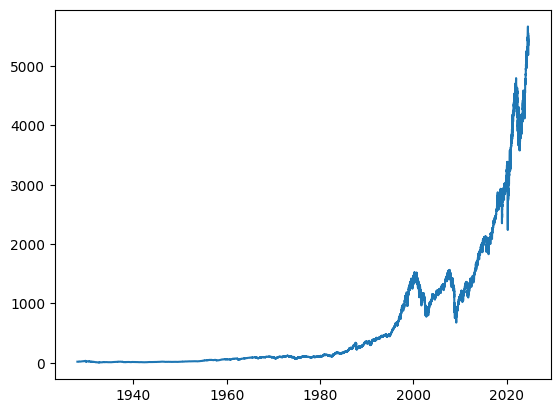

In [3]:

# Python
import pandas as pd
from prophet import Prophet


import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='^GSPC'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


#GSPC Stock Price Prediction

In [4]:
# Most recent stock prices
df.tail()


Close
Date                   
2024-08-09  5344.160156
2024-08-12  5344.390137
2024-08-13  5434.430176
2024-08-14  5455.209961
2024-08-15  5543.220215

In [5]:
# Most historic Stock Prices
df.head()

Close
Date                 
1927-12-30  17.660000
1928-01-03  17.760000
1928-01-04  17.719999
1928-01-05  17.549999
1928-01-06  17.660000

In [6]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [7]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuj0jkg1n/u3tnuqdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuj0jkg1n/u94ft6mh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97865', 'data', 'file=/tmp/tmpuj0jkg1n/u3tnuqdj.json', 'init=/tmp/tmpuj0jkg1n/u94ft6mh.json', 'output', 'file=/tmp/tmpuj0jkg1n/prophet_modelt6owhuk_/prophet_model-20240817011317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:13:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
24418 2025-01-09  4222.359863  3918.871621  4515.769056
24419 2025-01-10  4222.529272  3940.170446  4509.266849
24420 2025-01-11  4222.159593  3946.357895  4522.139449
24421 2025-01-12  4222.490266  3941.424744  4495.765233
24422 2025-01-13  4222.677401  3922.384354  4523.406554

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [9]:
plot_components_plotly(m, forecast)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#Walmart Stock Price Prediction

[*********************100%%**********************]  1 of 1 completed


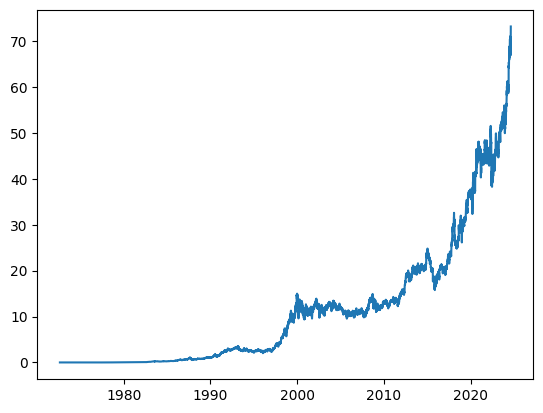

In [10]:
stock='WMT'



start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

data = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

data = data.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(data['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')

In [11]:
#date is the index so you need to make it a column
data["Date"] = data.index
data = data.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

In [12]:
w = Prophet()
w.fit(data)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuj0jkg1n/mitxjd1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuj0jkg1n/zzlfe_nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59184', 'data', 'file=/tmp/tmpuj0jkg1n/mitxjd1o.json', 'init=/tmp/tmpuj0jkg1n/zzlfe_nf.json', 'output', 'file=/tmp/tmpuj0jkg1n/prophet_modelorn6koya/prophet_model-20240817011410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:14:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:14:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
24418 2025-01-09  4222.359863  3940.342349  4519.379665
24419 2025-01-10  4222.529272  3921.950992  4521.658349
24420 2025-01-11  4222.159593  3945.980667  4506.541881
24421 2025-01-12  4222.490266  3928.598531  4535.939432
24422 2025-01-13  4222.677401  3937.695918  4515.937887

In [13]:
# Most historic Stock Prices
data.head()

y         ds
Date                           
1972-08-25  0.011698 1972-08-25
1972-08-28  0.011654 1972-08-28
1972-08-29  0.011521 1972-08-29
1972-08-30  0.011521 1972-08-30
1972-08-31  0.011343 1972-08-31

# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
